In [1]:
from PIL import Image
from src.h_fcn import *
from src.utils import init_model
from src.eval import evaluate_model
from src.utils import display_logs
import warnings
warnings.filterwarnings("ignore")
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("Device:", device)

Device: cuda:0


In [3]:
model = init_model()

dataset_path = "../data/ffhq256-1k-validation"

h_fcn_class = Inpainting

out = evaluate_model(model, h_fcn_class, dataset_path, num_images=5, num_ddim_steps=50,
                   num_samples=2, eta=.2, awd=True, show_steps=False, num_diffusion_timesteps=400,
                   steps_viz=200, device="cuda", run_dps=True, keep_logs=True)
                   # for n diffusion steps = 500 takes about 3 min per img (with gpu)

# out is actually a tupple with: [1]: the mean of some metrics
#                                [2]: the logs of the model, a tensor dict composed of
#                                     [original image, transormation, x_pred1, x_pred2 etc...]

Evaluating Images: 100%|██████████| 5/5 [03:24<00:00, 40.82s/it]


In [4]:
out[0]

{'PSNR': np.float64(31.19664649963379),
 'SSIM': np.float64(0.918788206577301),
 'LPIPS': np.float64(0.05195848420262337),
 'PSNR_d': np.float64(26.400775527954103),
 'SSIM_d': np.float64(0.7607620179653167),
 'LPIPS_d': np.float64(0.15395444855093957)}

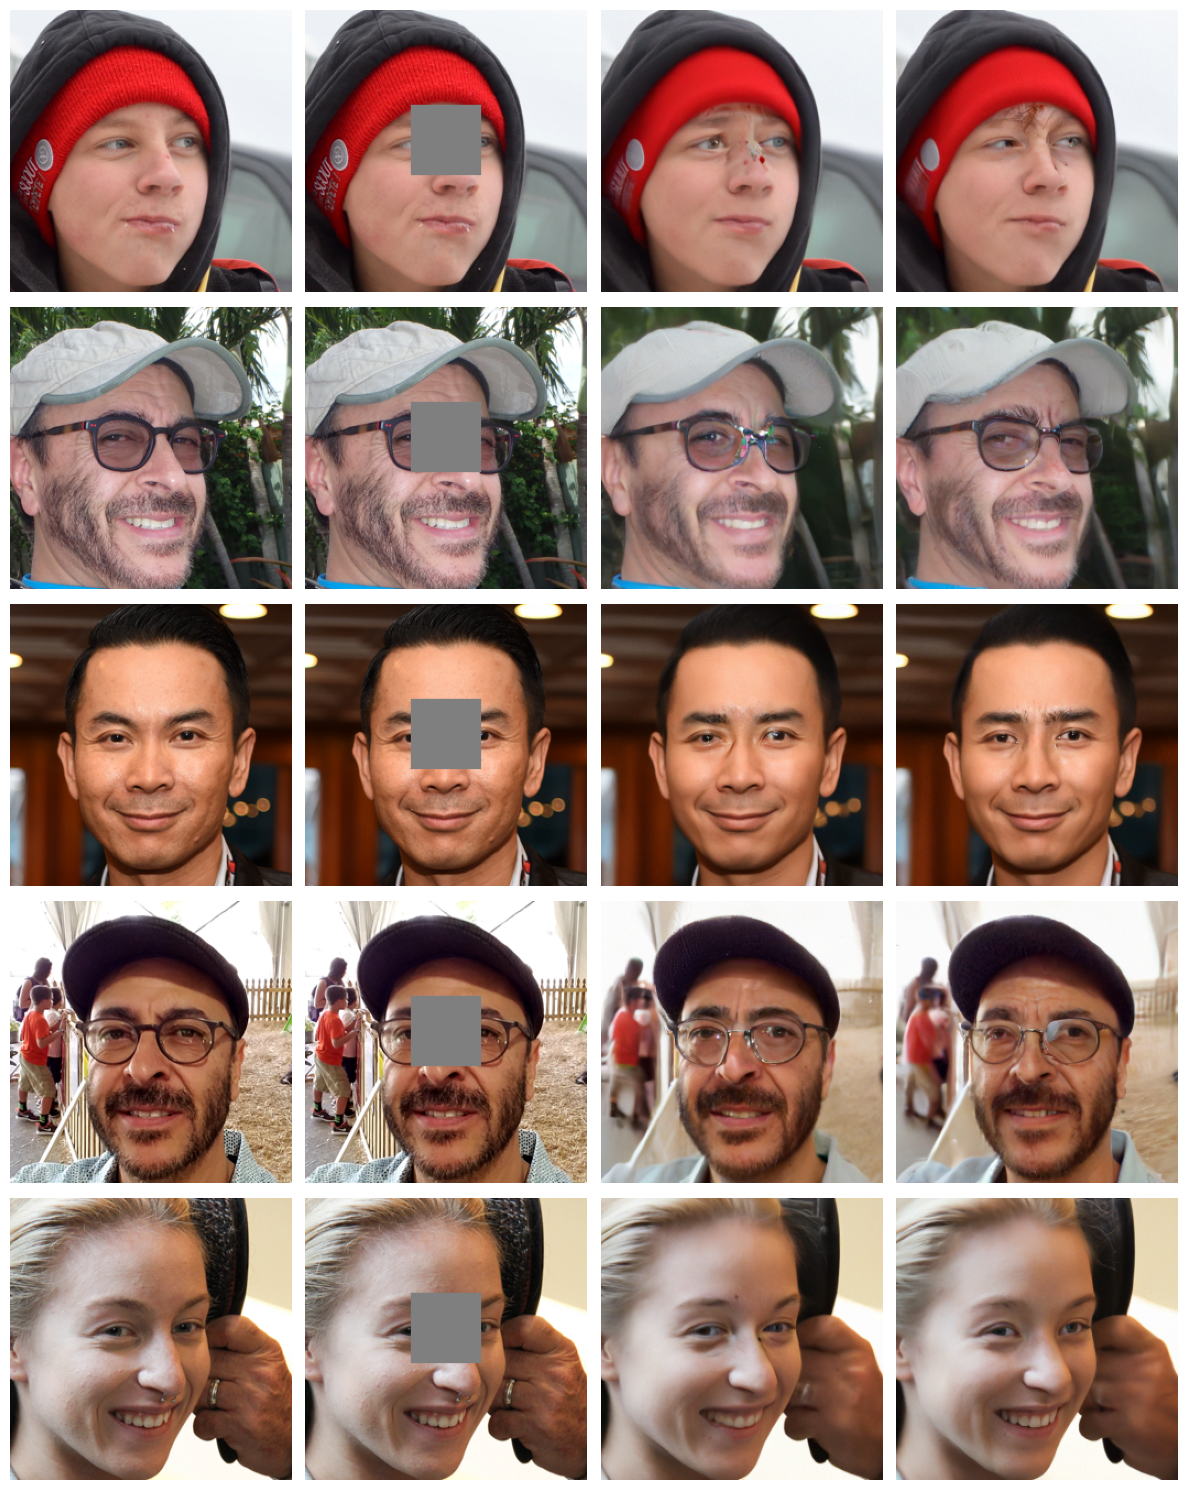

In [5]:
display_logs(out[-1][1])